# Importing the libraries

In [58]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Sci-kit 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc

#filter warnings
import warnings
warnings.filterwarnings('ignore')

# Data Collection and analyzing

In [2]:
df = pd.read_csv('Asteroid.csv')
df.columns

Index(['full_name', 'a', 'e', 'G', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'neo',
       'pha', 'moid'],
      dtype='object')

In [3]:
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [4]:
df.rename(columns = {'a':'Semi-Major axis',
                     'e':'eccentricity', 
                     'i':'Inclination with respect to x-y ecliptic plane(deg)',
                     'om':'Longitude of the ascending node',
                     'w':'argument of perihelion',
                     'q':'perihelion distance(au)',
                     'ad':'aphelion distance(au)',
                     'per_y':'Orbital period(YEARS)',
                     'data_arc':'data arc-span(d)',
                     'condition code':'Orbit condition code',
                     'n_obs_used':'Number of observation used',
                     'H':'Absolute Magnitude parameter',
                     'neo':'Near Earth Object',
                     'pha':'Physically Hazardous Asteroid',
                     'diameter':'diameter',
                     'extent':'Object bi/tri axial ellipsoid dimensions(Km)',
                     'albedo':'geometric albedo',
                     'rot_per':'Rotation Period(h)',
                     'GM':'Standard gravitational parameter, Product of mass and gravitational constant',
                     'BV':'Color index B-V magnitude difference',
                     'UB':'Color index U-B magnitude difference',
                     'IR':'Color index I-R magnitude difference',
                     'spec_B':'Spectral taxonomic type(SMASSII)',
                     'spec_T':'Spectral taxonomic type(Tholen)',
                     'G':'Magnitude slope parameter',
                     'moid':'Earth Minimum orbit Intersection Distance(au)'},inplace = True)


In [5]:
print("Name of Columns in dataset:\n")
df.columns

Name of Columns in dataset:



Index(['full_name', 'Semi-Major axis', 'eccentricity',
       'Magnitude slope parameter',
       'Inclination with respect to x-y ecliptic plane(deg)',
       'Longitude of the ascending node', 'argument of perihelion',
       'perihelion distance(au)', 'aphelion distance(au)',
       'Orbital period(YEARS)', 'data arc-span(d)', 'condition_code',
       'Number of observation used', 'Absolute Magnitude parameter',
       'diameter', 'Object bi/tri axial ellipsoid dimensions(Km)',
       'geometric albedo', 'Rotation Period(h)',
       'Standard gravitational parameter, Product of mass and gravitational constant',
       'Color index B-V magnitude difference',
       'Color index U-B magnitude difference',
       'Color index I-R magnitude difference',
       'Spectral taxonomic type(SMASSII)', 'Spectral taxonomic type(Tholen)',
       'Near Earth Object', 'Physically Hazardous Asteroid',
       'Earth Minimum orbit Intersection Distance(au)'],
      dtype='object')

In [6]:
print("Describe:\n")
df.describe()

Describe:



,Semi-Major axis,eccentricity,Magnitude slope parameter,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Number of observation used,Absolute Magnitude parameter,geometric albedo,Rotation Period(h),"Standard gravitational parameter, Product of mass and gravitational constant",Color index B-V magnitude difference,Color index U-B magnitude difference,Color index I-R magnitude difference,Earth Minimum orbit Intersection Distance(au)
count,839734.000000,839736.000000,119.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,839736.000000,837042.000000,136452.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,8.228140e+05
mean,2.843217,0.155633,0.178739,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,254.617708,16.786069,0.130052,21.136772,7.821928e+00,0.769212,0.364396,-0.33,1.423511e+00
std,37.327031,0.093888,0.134603,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,363.004548,1.821274,0.109983,73.131751,1.678880e+01,0.088625,0.095780,NaN,2.251048e+00
min,-32588.942986,0.000000,-0.250000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,3.437640e-07
25%,2.385244,0.091453,0.100000,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,9.785395e-01
50%,2.644219,0.143654,0.190000,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,1.237880e+00
75%,2.996035,0.199400,0.250000,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,292.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,1.590610e+00
max,3043.149073,1.201134,0.600000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,7.950130e+01


In [7]:
print("Info:\n")
print(df.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column                                                                        Non-Null Count   Dtype  
---  ------                                                                        --------------   -----  
 0   full_name                                                                     839736 non-null  object 
 1   Semi-Major axis                                                               839734 non-null  float64
 2   eccentricity                                                                  839736 non-null  float64
 3   Magnitude slope parameter                                                     119 non-null     float64
 4   Inclination with respect to x-y ecliptic plane(deg)                           839736 non-null  float64
 5   Longitude of the ascending node                                               839736 non-null  float64
 6   argument of p

In [8]:
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



full_name                                                                            0
Semi-Major axis                                                                      2
eccentricity                                                                         0
Magnitude slope parameter                                                       839617
Inclination with respect to x-y ecliptic plane(deg)                                  0
Longitude of the ascending node                                                      0
argument of perihelion                                                               0
perihelion distance(au)                                                              0
aphelion distance(au)                                                                6
Orbital period(YEARS)                                                                1
data arc-span(d)                                                                 15789
condition_code                             

In [9]:
df_new = df.drop(['full_name',
                  'Magnitude slope parameter',
                  'Number of observation used',
                  'Rotation Period(h)',
                  'Near Earth Object',
                  'Physically Hazardous Asteroid',
                  'condition_code',
                  'Spectral taxonomic type(SMASSII)',
                  'Standard gravitational parameter, Product of mass and gravitational constant',
                  'Color index B-V magnitude difference',
                  'Color index U-B magnitude difference',
                  'Spectral taxonomic type(Tholen)',
                  'Object bi/tri axial ellipsoid dimensions(Km)',
                  'Color index I-R magnitude difference'],axis = 1)

In [10]:
print("New Info:\n")
df_new.info()

New Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 13 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Semi-Major axis                                      839734 non-null  float64
 1   eccentricity                                         839736 non-null  float64
 2   Inclination with respect to x-y ecliptic plane(deg)  839736 non-null  float64
 3   Longitude of the ascending node                      839736 non-null  float64
 4   argument of perihelion                               839736 non-null  float64
 5   perihelion distance(au)                              839736 non-null  float64
 6   aphelion distance(au)                                839730 non-null  float64
 7   Orbital period(YEARS)                                839735 non-null  float64
 8   data arc-span(d)                           

In [11]:
print("New Describe:\n")
df_new.describe()

New Describe:



,Semi-Major axis,eccentricity,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Absolute Magnitude parameter,geometric albedo,Earth Minimum orbit Intersection Distance(au)
count,839734.000000,839736.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,837042.000000,136452.000000,8.228140e+05
mean,2.843217,0.155633,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,16.786069,0.130052,1.423511e+00
std,37.327031,0.093888,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,1.821274,0.109983,2.251048e+00
min,-32588.942986,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,-1.100000,0.001000,3.437640e-07
25%,2.385244,0.091453,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,15.900000,0.053000,9.785395e-01
50%,2.644219,0.143654,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,16.800000,0.078000,1.237880e+00
75%,2.996035,0.199400,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,17.600000,0.188000,1.590610e+00
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,33.200000,1.000000,7.950130e+01


In [12]:
print("The final columns are: \n")
df_new.head()

The final columns are: 



,Semi-Major axis,eccentricity,Inclination with respect to x-y ecliptic plane(deg),Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period(YEARS),data arc-span(d),Absolute Magnitude parameter,diameter,geometric albedo,Earth Minimum orbit Intersection Distance(au)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,3.34,939.4,0.0900,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,4.13,545,0.1010,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,5.33,246.596,0.2140,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,3.20,525.4,0.4228,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,6.85,106.699,0.2740,1.09589


# Data Preprocessing

In [13]:
dataframe = df_new.dropna(axis=0, how= 'any', thresh=None, subset=None, inplace=False)

In [14]:
x = dataframe.drop(['diameter'], axis=1)
y = dataframe['diameter']

In [15]:
dataframe['diameter'] = pd.to_numeric(dataframe['diameter'], errors='coerce')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 0.24835123  0.59549747 -1.20217228 ... -0.61745475 -0.40951914
   0.25866811]
 [-0.42612144 -1.55648855 -1.07040316 ... -0.11961903  3.23554383
  -0.51508124]
 [ 0.23978768 -0.69010195 -0.59271038 ... -1.61312617 -0.47314867
   0.9015784 ]
 ...
 [ 0.18234367 -1.28612105  1.7893578  ...  0.02261974 -0.64585739
   1.07856913]
 [-0.17585856 -0.8686578  -1.03517841 ...  1.16052994 -0.44587887
  -0.14808926]
 [-0.15794467  1.75543825 -0.64847052 ...  0.80493301  2.00840293
  -1.06959137]]
[[ 0.25466187 -1.64628695 -0.05120301 ...  0.02261974 -0.78220638
   1.37717653]
 [-0.1624809   0.30747962  0.22918469 ... -1.18640985  2.27201097
  -0.56214523]
 [ 0.19071318 -0.91459939  0.09870775 ... -0.97305168  0.10860702
   0.95191485]
 ...
 [ 0.21045326 -0.73496556  0.68172867 ... -0.04849965 -0.47314867
   0.93700035]
 [-0.30330922 -0.18046343 -1.12777998 ...  1.37388811 -0.69130705
  -0.72981439]
 [ 0.10652961 -1.54025674 -0.28851653 ... -0.40409658  0.38130499
   0.96244624]]


# Data Visualization

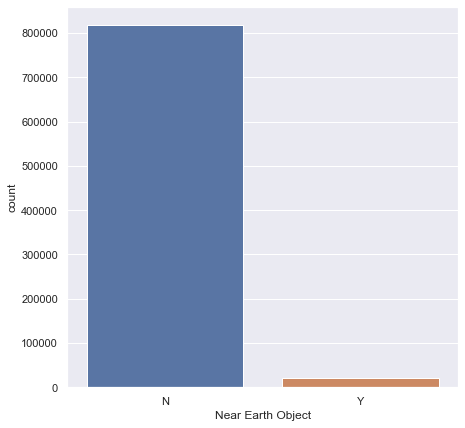

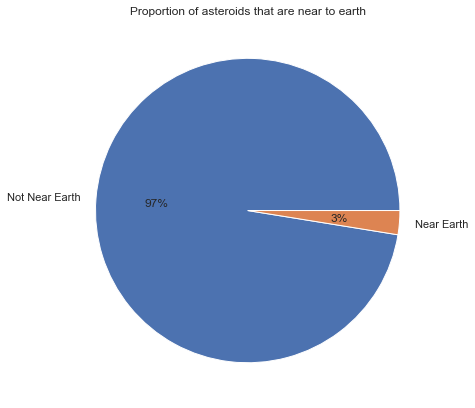

There are 21389  potential asteroids that are near to earth and 818341 that are not .


In [18]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(df['Near Earth Object'])
near_earth =  df["Near Earth Object"].value_counts()[1]
not_near_earth = df["Near Earth Object"].value_counts()[0]
plt.figure(figsize=(7,7))
plt.pie(df["Near Earth Object"].value_counts().values,
        labels=['Not Near Earth','Near Earth'], 
        autopct="%1.0f%%")
plt.title("Proportion of asteroids that are near to earth")
plt.show()
print("There are " + str(near_earth) + "  potential asteroids that are near to earth " 
      + "and " + str(not_near_earth) + " that are not .")

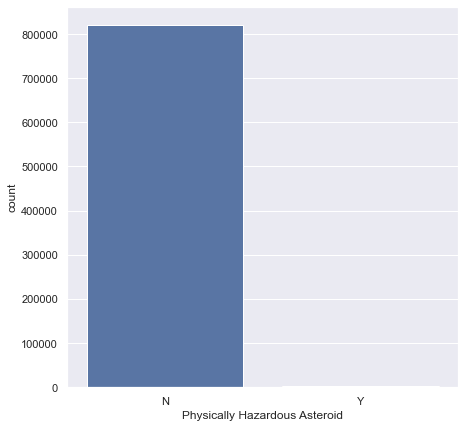

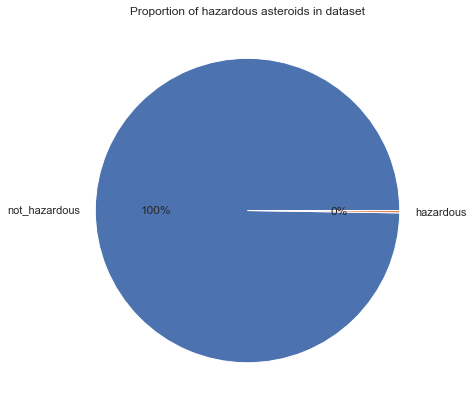

There are 2014  potential asteroids that can collide and 820800 that might miss the collision.


In [19]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(df['Physically Hazardous Asteroid'])
hazardous =  df["Physically Hazardous Asteroid"].value_counts()[1]
not_hazardous = df["Physically Hazardous Asteroid"].value_counts()[0]
plt.figure(figsize=(7,7))
plt.pie(df["Physically Hazardous Asteroid"].value_counts().values,
        labels=['not_hazardous','hazardous'], 
        autopct="%1.0f%%")
plt.title("Proportion of hazardous asteroids in dataset")
plt.show()
print("There are " + str(hazardous) + "  potential asteroids that can collide " 
      + "and " + str(not_hazardous) + " that might miss the collision.")


<AxesSubplot:xlabel='Spectral taxonomic type(SMASSII)', ylabel='count'>

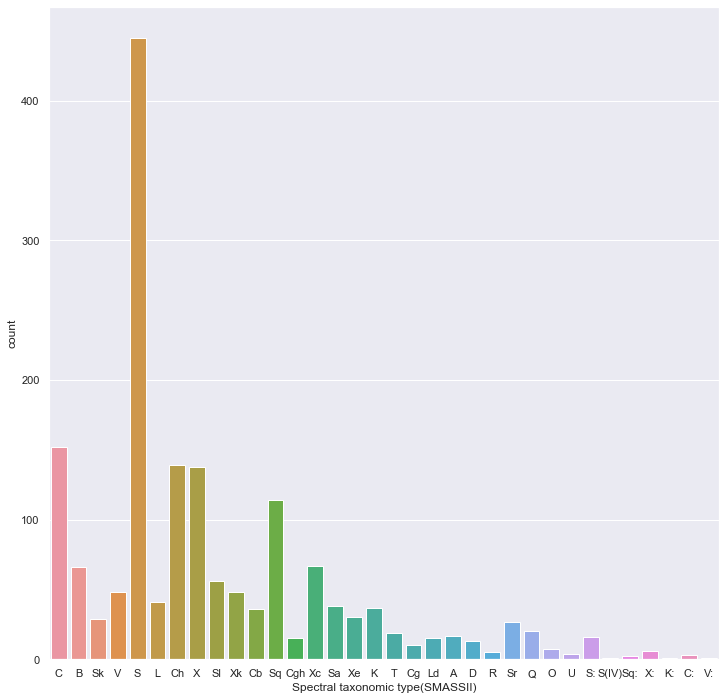

In [21]:
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(df['Spectral taxonomic type(SMASSII)'])

<AxesSubplot:xlabel='Number of observation used', ylabel='Count'>

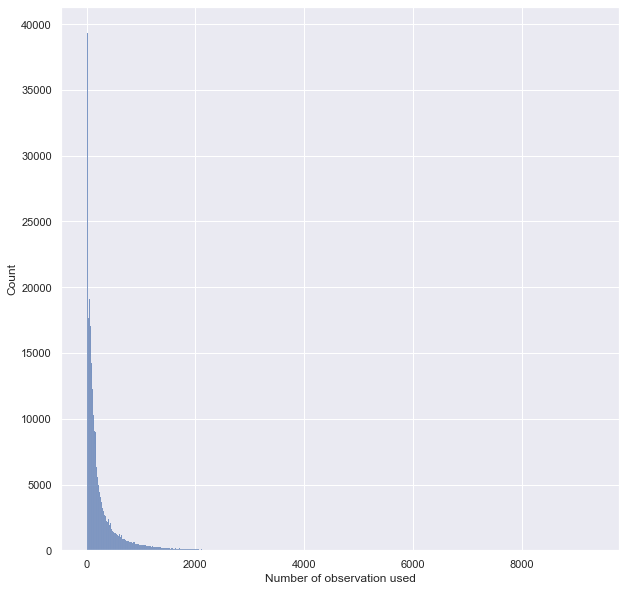

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(df['Number of observation used'])

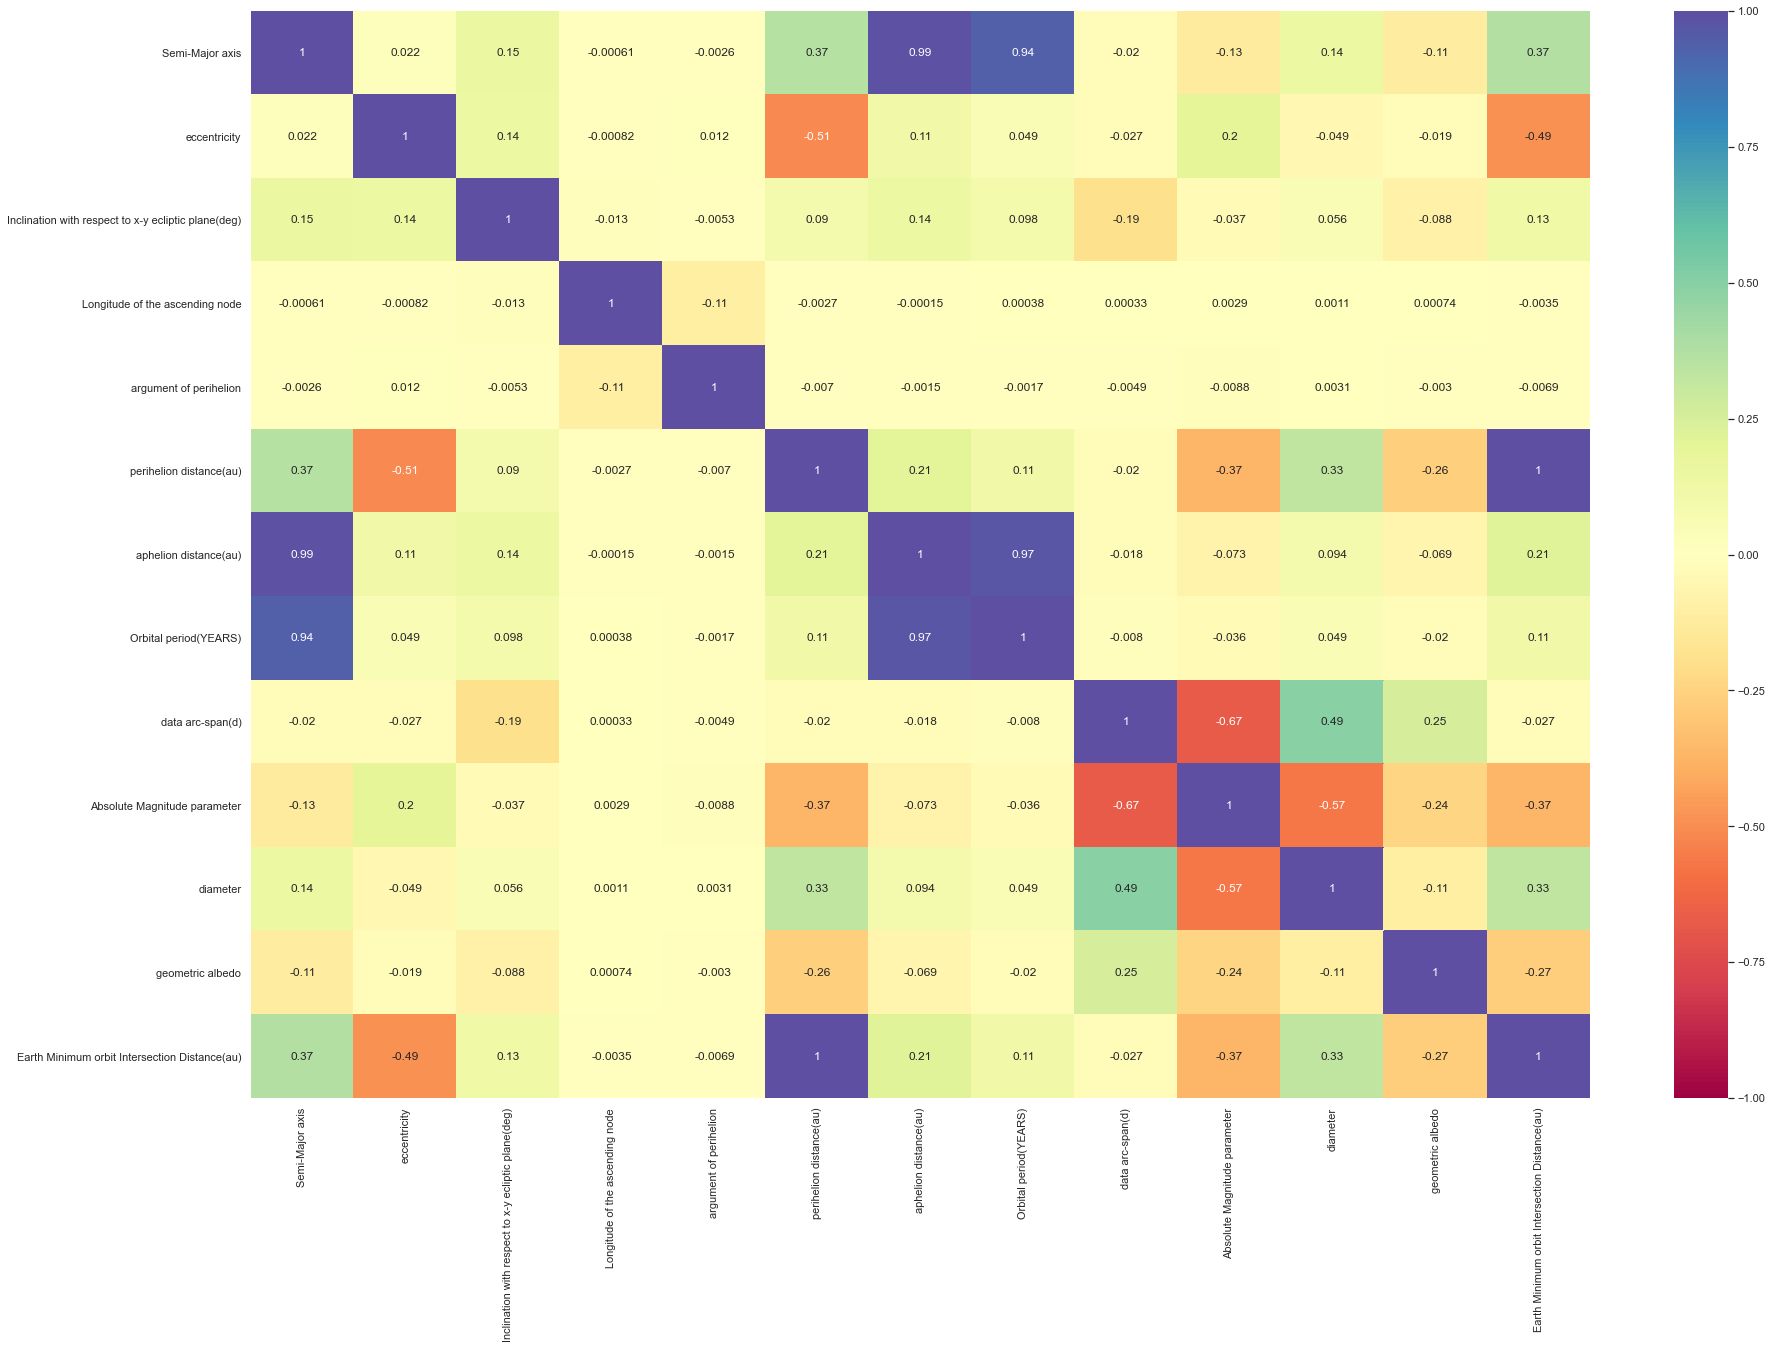

In [23]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(dataframe.corr(), 
            vmin=-1, 
            vmax=1, 
            cmap="Spectral", 
            annot=True)
plt.show()
plt.close()

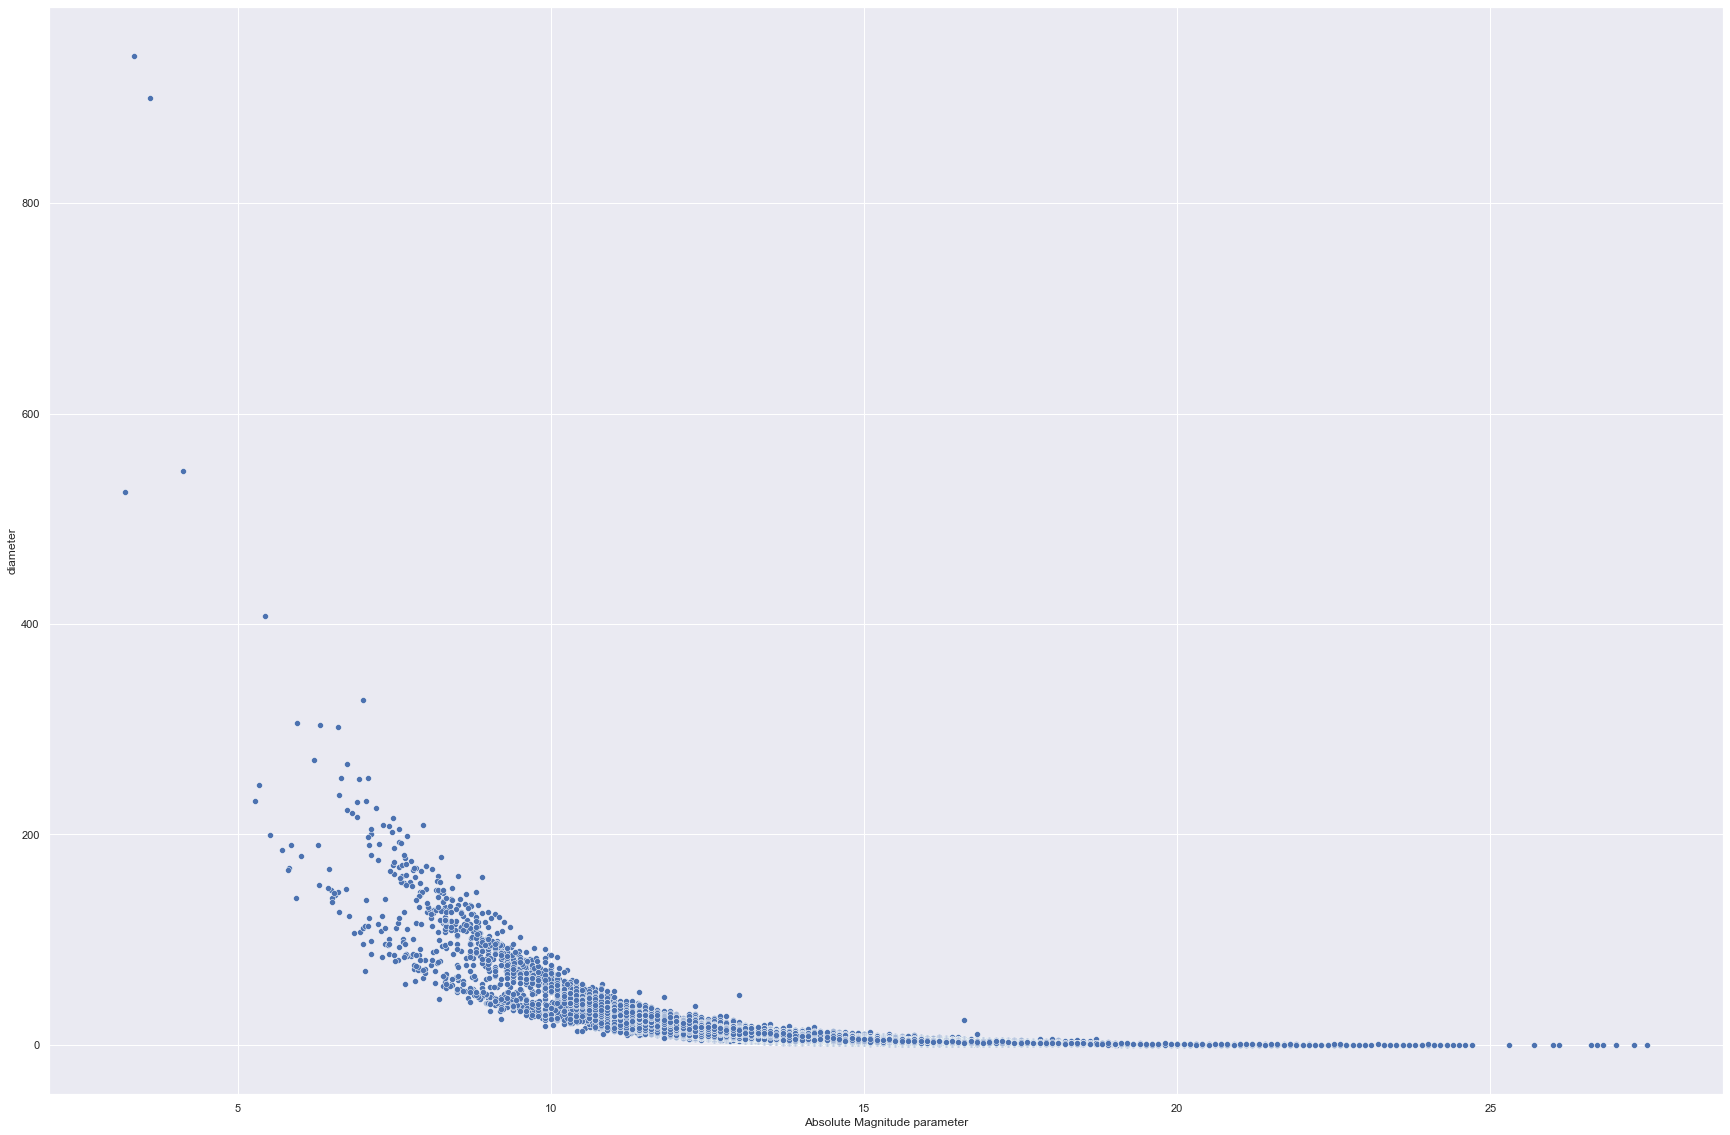

In [24]:
sns.scatterplot(data = dataframe,
                x = 'Absolute Magnitude parameter',
                y = 'diameter')
sns.set(rc={'figure.figsize':(10,10)})

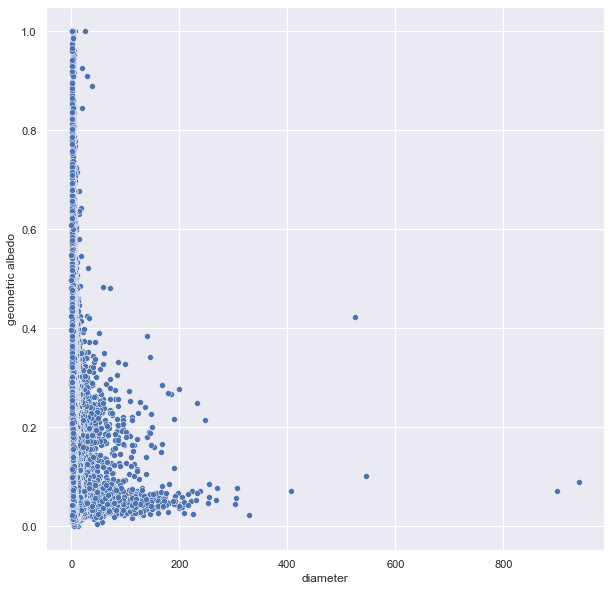

In [25]:
sns.scatterplot(data = dataframe,
                x = 'diameter',
                y = 'geometric albedo')
sns.set(rc={'figure.figsize':(10,10)})

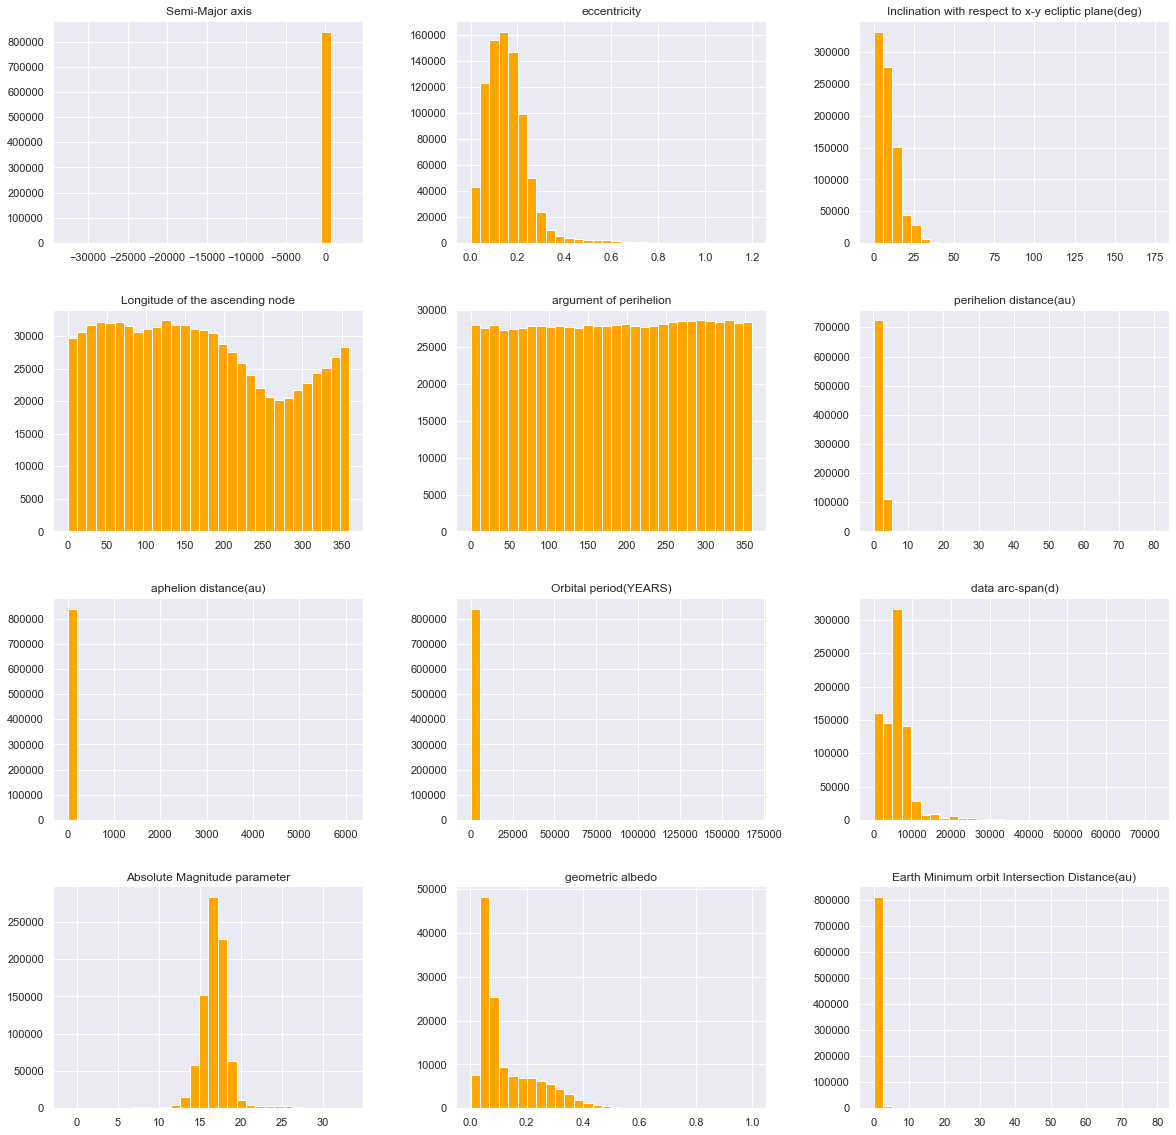

In [26]:
df_new.hist(bins = 30, figsize = (20,20), color='orange')
plt.show()

In [27]:
def plot(features):
    plt.rcParams['figure.figsize'] = (30,9)
    sns.distplot(dataframe[features],
                hist = True,
                kde = True,
                rug = True,
                color = 'red')
    plt.show()

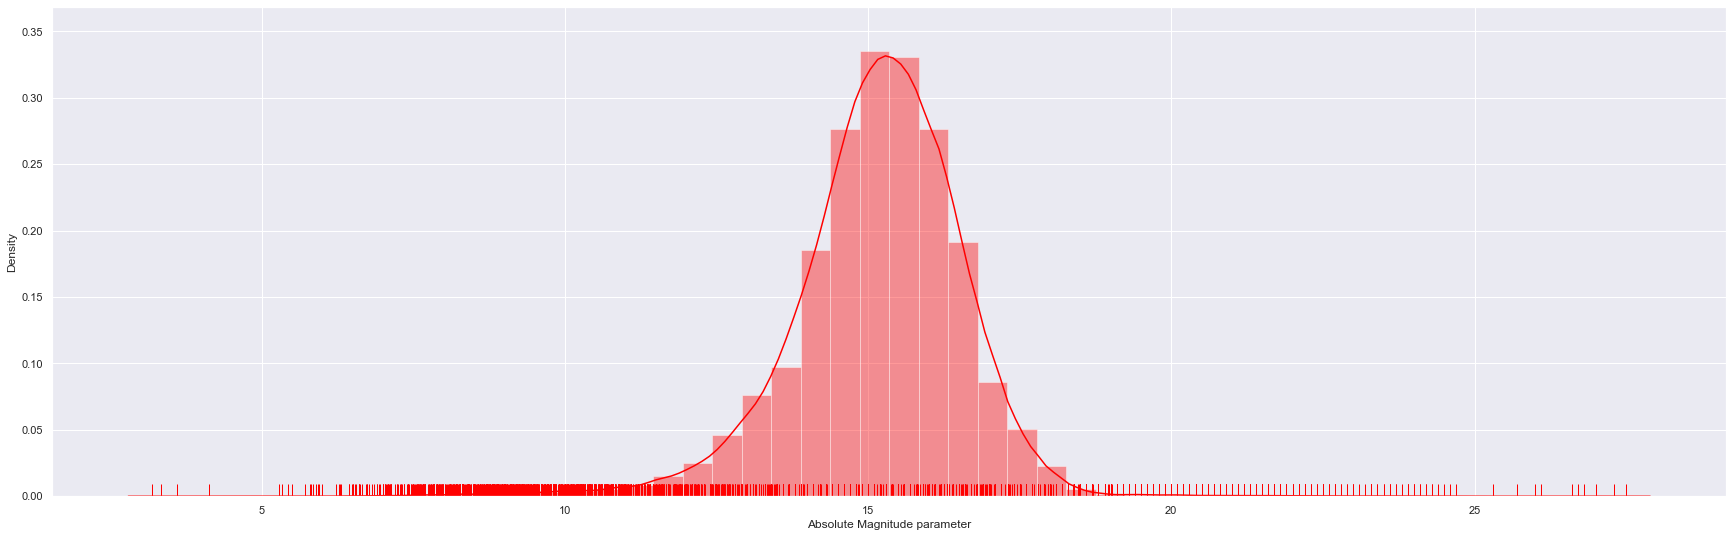

In [28]:
plot('Absolute Magnitude parameter')

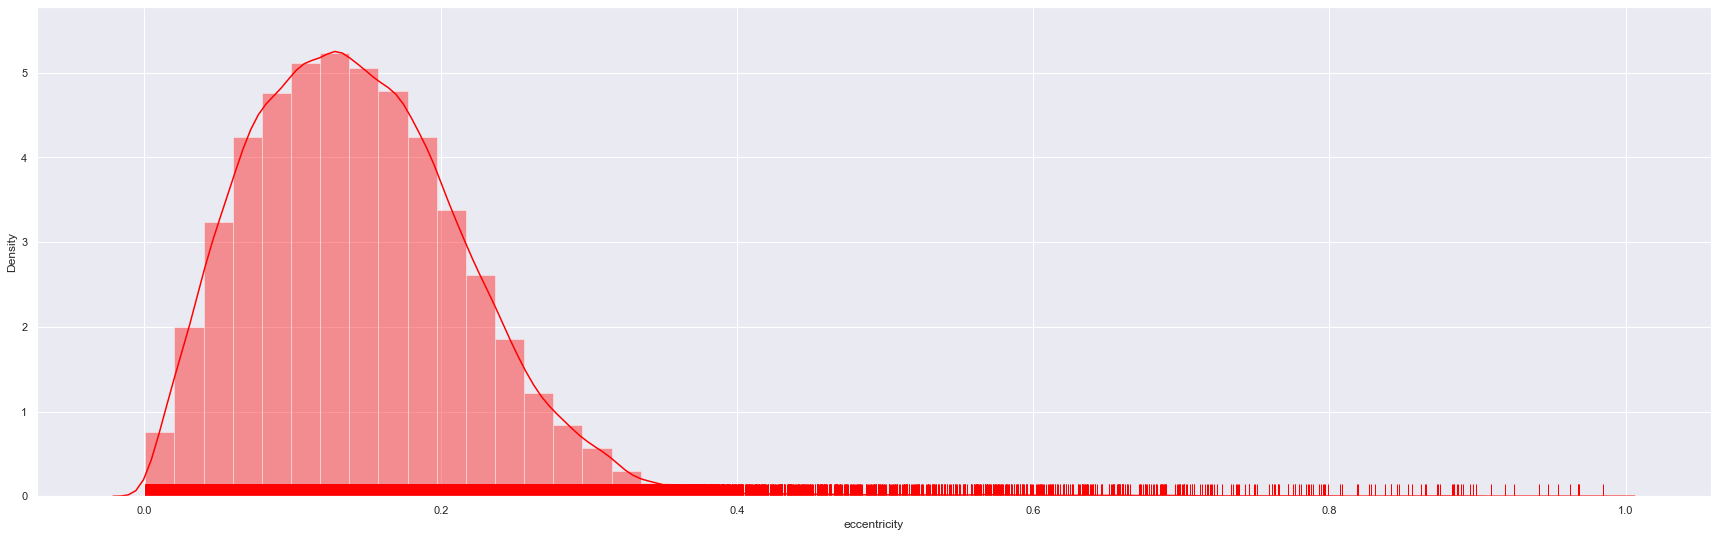

In [29]:
plot('eccentricity')

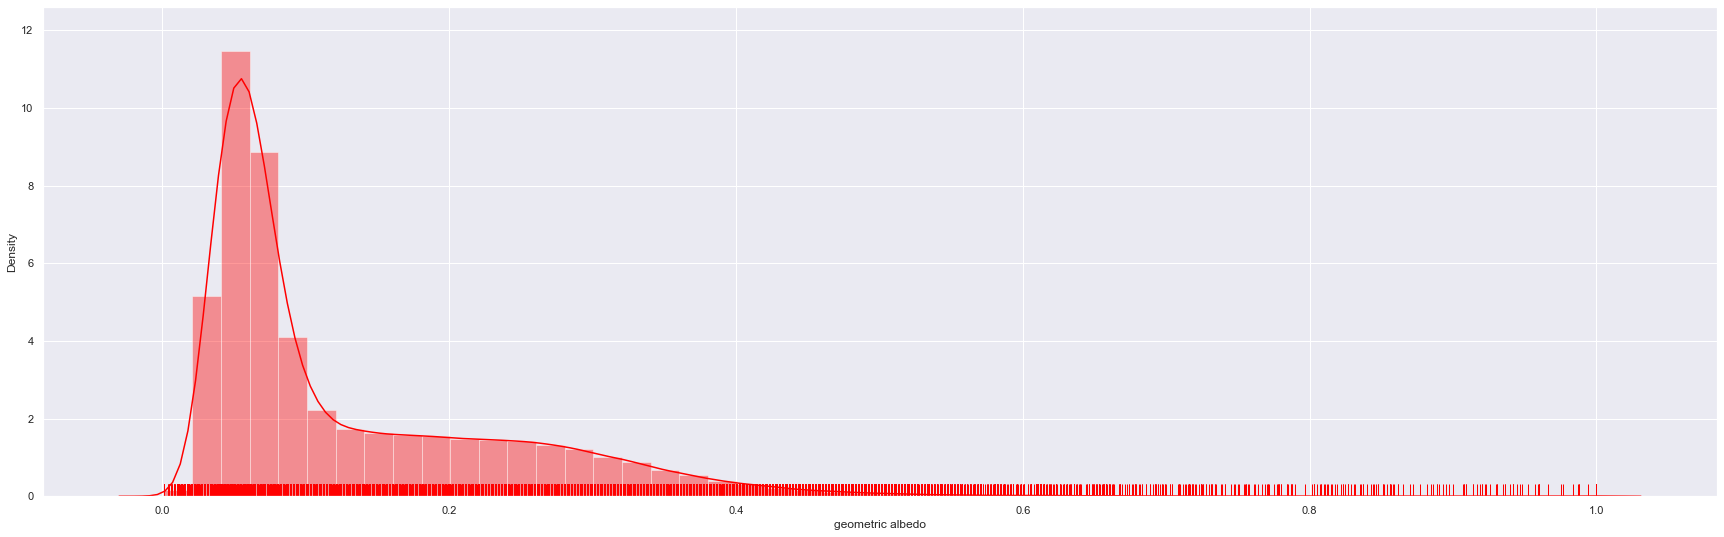

In [30]:
plot('geometric albedo')

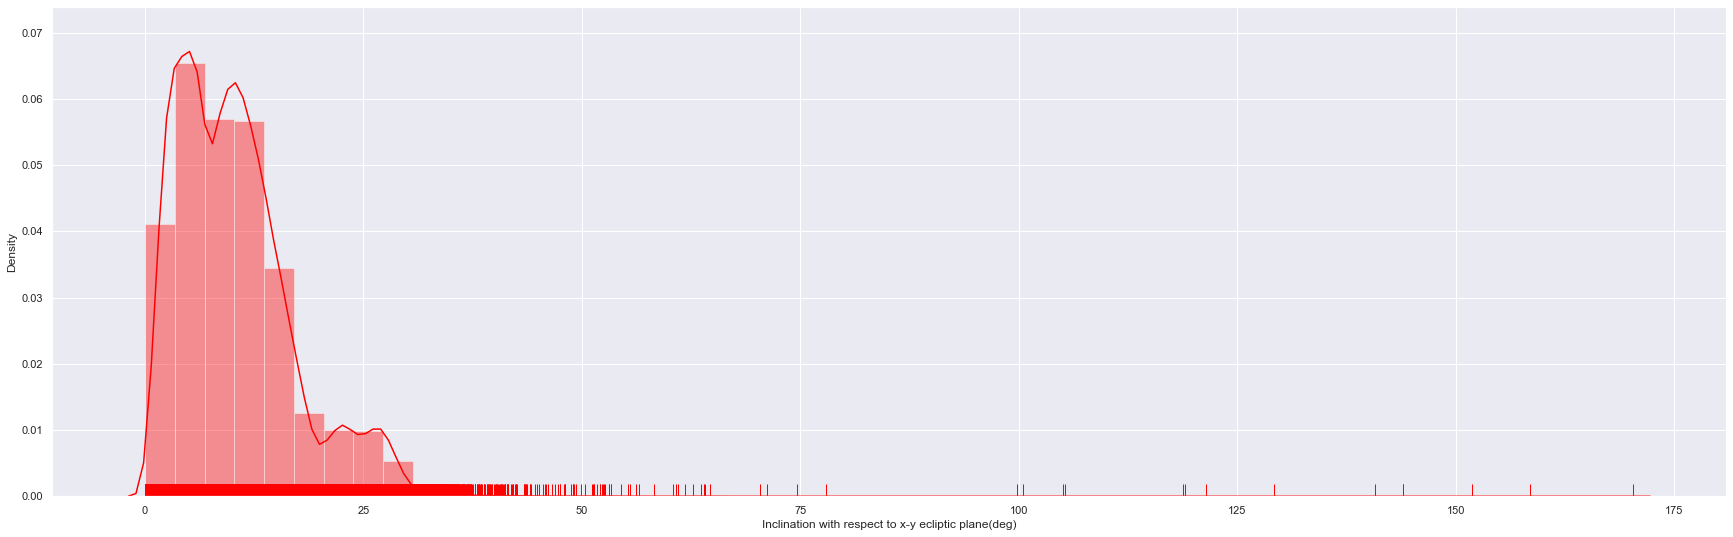

In [31]:
plot('Inclination with respect to x-y ecliptic plane(deg)')

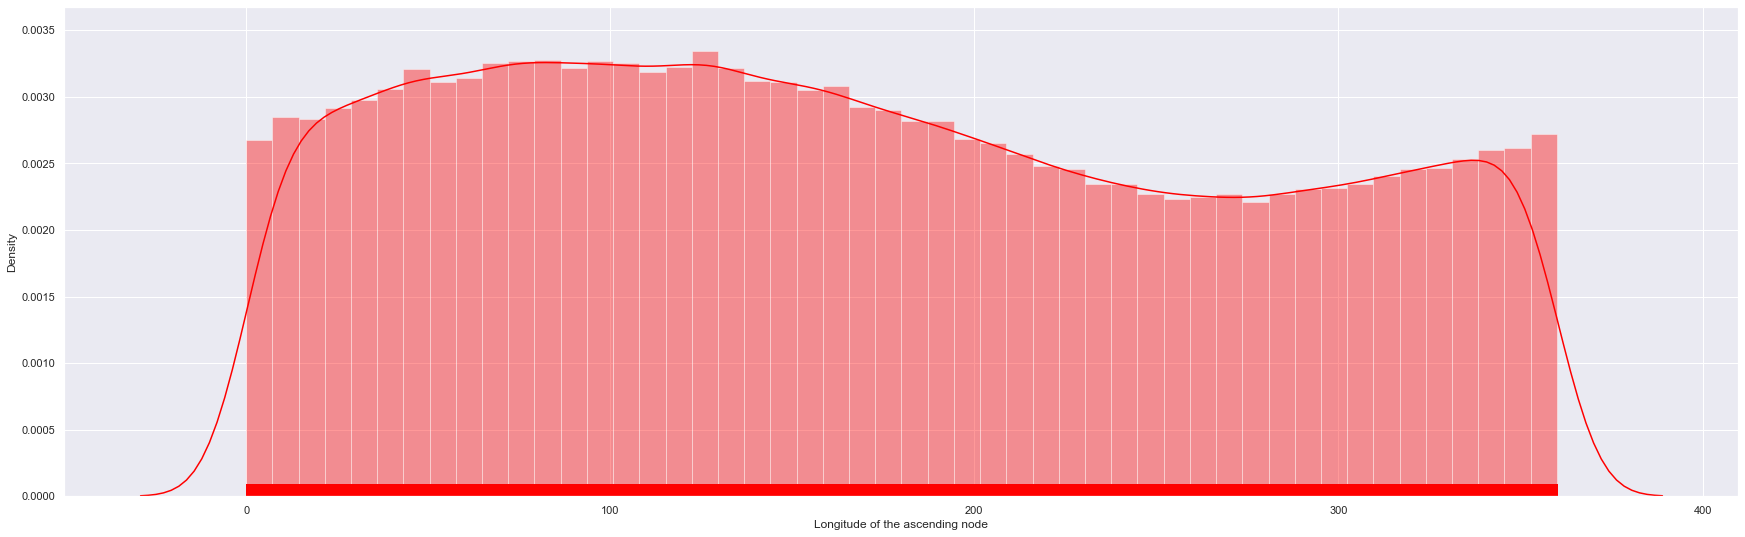

In [32]:
plot('Longitude of the ascending node')

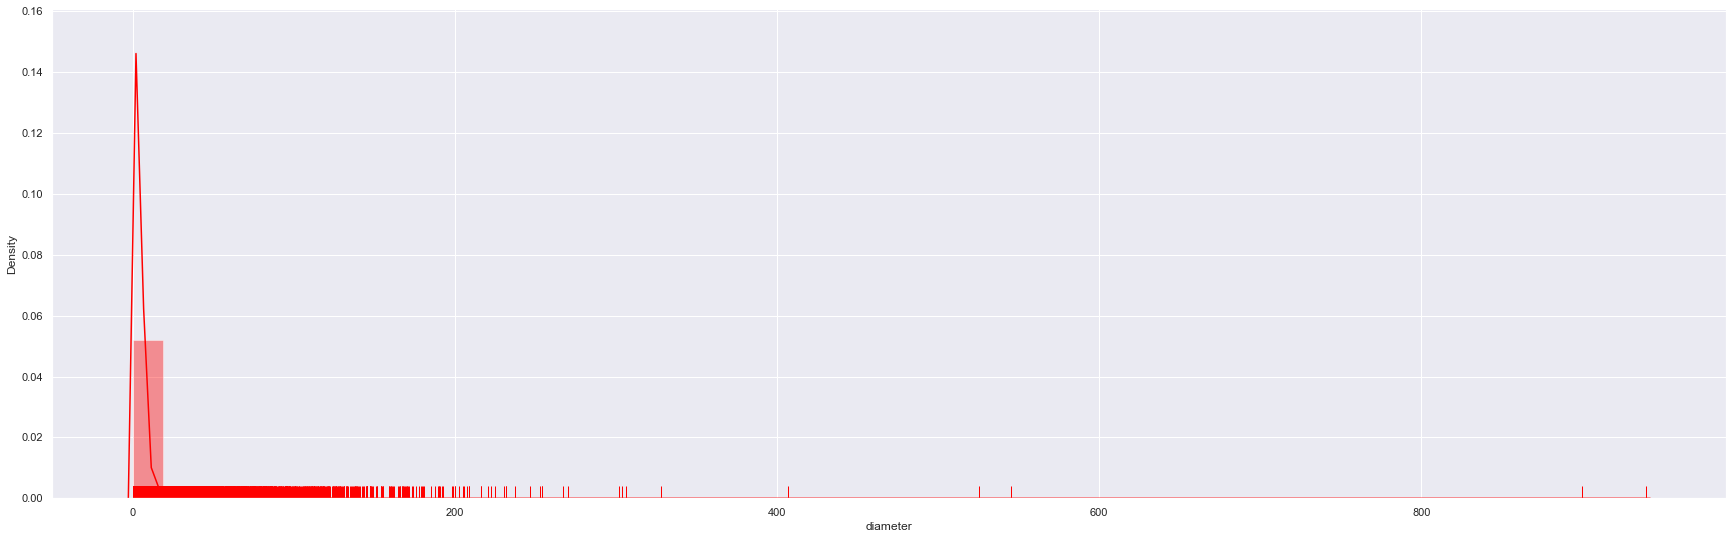

In [33]:
plot('diameter')

# Data Modeling

In [34]:
def evaluation(tested,predicted,model):
    print("""The evaluation of this Model""")
    r2_test = metrics.r2_score(tested,predicted)
    kf = KFold(5,shuffle = True, random_state = 1)
    scores = cross_val_score(model, x, y, cv=kf, scoring = 'r2')
    print('R squared value:', r2_test)
    print("The scores are as following:",scores)
    print('The mean of the scores is:',scores.mean())
    print('Mean Squared Error is:',math.sqrt(mean_squared_error(tested,predicted)))
    

# Decision Tree 

In [35]:
regressor_tree = DecisionTreeRegressor(max_depth = 12)
regressor_tree = regressor_tree.fit(x_train,y_train)
y_pred = regressor_tree.predict(x_test)

In [36]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    depth_model = DecisionTreeRegressor(max_depth = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'max_depth':range(1,15), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,max_depth,train_acc,test_acc
0,1,0.511904,0.425345
1,2,0.717478,0.746368
2,3,0.836576,0.852460
3,4,0.908217,0.919109
4,5,0.953693,0.955916
5,6,0.971987,0.971468
6,7,0.982289,0.976299
7,8,0.987780,0.978845
8,9,0.991304,0.981488
9,10,0.993619,0.976825


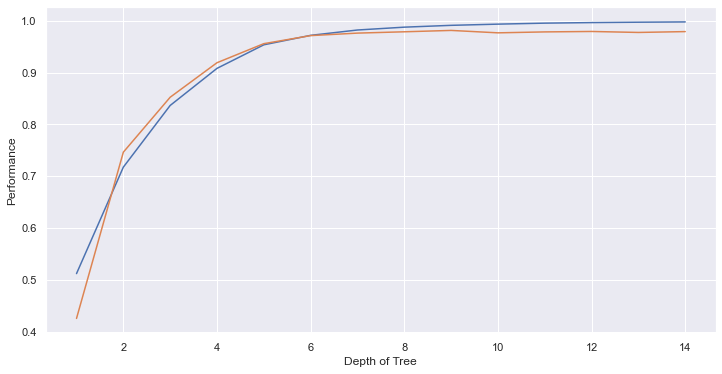

In [37]:
plt.figure(figsize = (12,6))
plt.plot(dataframe['max_depth'], dataframe['train_acc'])
plt.plot(dataframe['max_depth'], dataframe['test_acc'])
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.show()

In [38]:
evaluation(y_test,y_pred,regressor_tree)

The evaluation of this Model
R squared value: 0.9786389802998104
The scores are as following: [0.89539271 0.97175803 0.89147322 0.98203918 0.91111569]
The mean of the scores is: 0.9303557651488858
Mean Squared Error is: 1.447351105439685


# Ada Boost

In [39]:
regressor_Ada = AdaBoostRegressor(n_estimators = 5)
regressor_Ada = regressor_Ada.fit(x_train,y_train)
y_pred = regressor_Ada.predict(x_test)

In [40]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    depth_model = AdaBoostRegressor(n_estimators = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'n_estimators':range(1,15), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,n_estimators,train_acc,test_acc
0,1,0.817483,0.815996
1,2,0.839706,0.820686
2,3,0.859275,0.823586
3,4,0.856550,0.869358
4,5,0.884654,0.843992
5,6,0.847096,0.812527
6,7,0.881415,0.835199
7,8,0.891610,0.902944
8,9,0.869834,0.832037
9,10,0.857892,0.868287


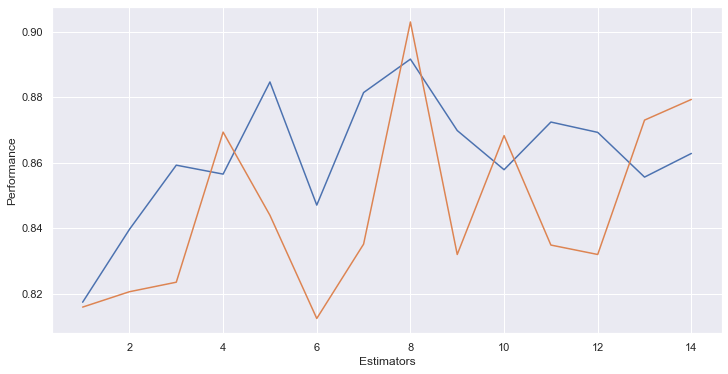

In [41]:
plt.figure(figsize = (12,6))
plt.plot(dataframe['n_estimators'], dataframe['train_acc'])
plt.plot(dataframe['n_estimators'], dataframe['test_acc'])
plt.xlabel('Estimators')
plt.ylabel('Performance')
plt.show()

In [42]:
evaluation(y_test, y_pred,regressor_Ada)

The evaluation of this Model
R squared value: 0.8142585987833659
The scores are as following: [0.76786001 0.84871595 0.80197881 0.83873474 0.82916076]
The mean of the scores is: 0.8172900529142917
Mean Squared Error is: 4.267929782424294


# Multi Layer Perceptron

In [51]:
regressor_mlp = MLPRegressor(hidden_layer_sizes = 5)
regressor_mlp.fit(x_train, y_train)
y_pred = regressor_mlp.predict(x_test)

In [52]:
train_accuracy = []
test_accuracy = []
for depth in range(1,20):
    depth_model = MLPRegressor(hidden_layer_sizes = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'Hidden Layers':range(1,20), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,Hidden Layers,train_acc,test_acc
0,1,0.787178,0.713106
1,2,0.872936,0.795205
2,3,0.900360,0.845406
3,4,0.931479,0.904751
4,5,0.933836,0.902721
5,6,0.932727,0.880348
6,7,0.932037,0.893611
7,8,0.943465,0.915524
8,9,0.930760,0.883014
9,10,0.914973,0.888276


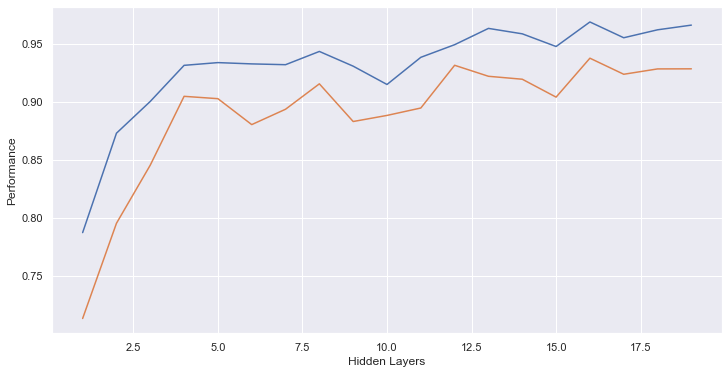

In [53]:
plt.figure(figsize = (12,6))
plt.plot(dataframe['Hidden Layers'], dataframe['train_acc'])
plt.plot(dataframe['Hidden Layers'], dataframe['test_acc'])
plt.xlabel('Hidden Layers')
plt.ylabel('Performance')
plt.show()

In [54]:
evaluation(y_test,y_pred,regressor_mlp)

The evaluation of this Model
R squared value: 0.8986030018261733
The scores are as following: [0.34835391 0.68200845 0.38027356 0.51751141 0.00377884]
The mean of the scores is: 0.3863852330742488
Mean Squared Error is: 3.1533738069951927


# Random Forest

In [43]:
regressor_ensemble = RandomForestRegressor(n_estimators = 10,random_state = 0)
regressor_ensemble.fit(x_train,y_train)
y_pred = regressor_ensemble.predict(x_test)

In [44]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    depth_model = RandomForestRegressor(n_estimators = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'n_estimators':range(1,15), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,n_estimators,train_acc,test_acc
0,1,0.985398,0.974287
1,2,0.955675,0.893588
2,3,0.990033,0.971236
3,4,0.982321,0.909827
4,5,0.984443,0.958218
5,6,0.968977,0.910653
6,7,0.982914,0.967122
7,8,0.987658,0.952774
8,9,0.988690,0.937107
9,10,0.986645,0.938414


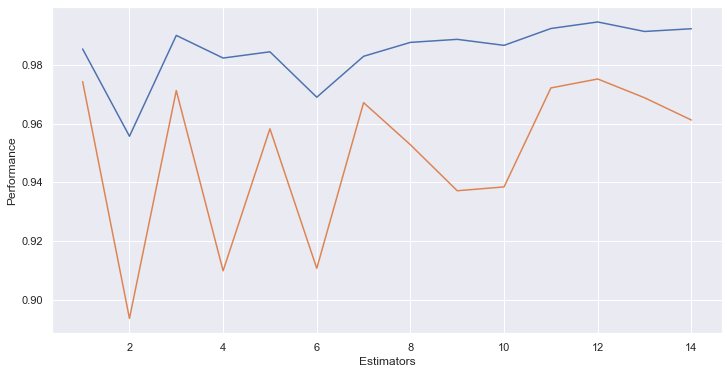

In [45]:
plt.figure(figsize = (12,6))
plt.plot(dataframe['n_estimators'], dataframe['train_acc'])
plt.plot(dataframe['n_estimators'], dataframe['test_acc'])
plt.xlabel('Estimators')
plt.ylabel('Performance')
plt.show()

In [46]:
evaluation(y_test, y_pred, regressor_ensemble)

The evaluation of this Model
R squared value: 0.9483355298371577
The scores are as following: [0.97518415 0.97455885 0.95199458 0.9652737  0.95900389]
The mean of the scores is: 0.9652030338678503
Mean Squared Error is: 2.2509139713905384


# Gradient Boosting 

In [47]:
regressor_boosting = GradientBoostingRegressor(n_estimators = 8)
regressor_boosting.fit(x_train, y_train)
y_pred = regressor_boosting.predict(x_test)

In [48]:
train_accuracy = []
test_accuracy = []
for depth in range(1,30):
    depth_model = GradientBoostingRegressor(n_estimators = depth)
    depth_model.fit(x_train,y_train)
    train_accuracy.append(depth_model.score(x_train,y_train))
    test_accuracy.append(depth_model.score(x_test, y_test)) 
dataframe = pd.DataFrame({'n_estimators':range(1,30), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
dataframe

,n_estimators,train_acc,test_acc
0,1,0.158949,0.164678
1,2,0.289498,0.281286
2,3,0.395962,0.373547
3,4,0.487125,0.455750
4,5,0.561547,0.541181
5,6,0.624656,0.600233
6,7,0.677861,0.646466
7,8,0.721469,0.714305
8,9,0.759482,0.720505
9,10,0.791582,0.762950


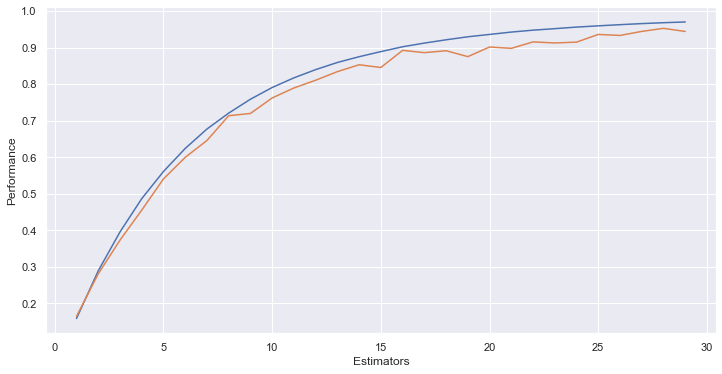

In [49]:
plt.figure(figsize = (12,6))
plt.plot(dataframe['n_estimators'], dataframe['train_acc'])
plt.plot(dataframe['n_estimators'], dataframe['test_acc'])
plt.xlabel('Estimators')
plt.ylabel('Performance')
plt.show()

In [50]:
evaluation(y_test, y_pred, regressor_boosting)   

The evaluation of this Model
R squared value: 0.6809957447055079
The scores are as following: [0.72204728 0.69301519 0.72997109 0.69097334 0.66601305]
The mean of the scores is: 0.7004039911827491
Mean Squared Error is: 5.5932102521288565


# Model Comparison

In [55]:
models = [regressor_tree,regressor_Ada,regressor_mlp,regressor_ensemble,regressor_boosting]

In [56]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,x_test,y_test,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

DecisionTreeRegressor: 
----------
0.9126708713882484
4.041820837582878
------------------------------
AdaBoostRegressor: 
----------
0.7801224550219803
5.190851070085746
------------------------------
MLPRegressor: 
----------
0.7789207648237966
5.70912856534636
------------------------------
RandomForestRegressor: 
----------
0.9090547274819354
4.356326706637647
------------------------------
GradientBoostingRegressor: 
----------
0.6536927131422434
6.545057396665452
------------------------------


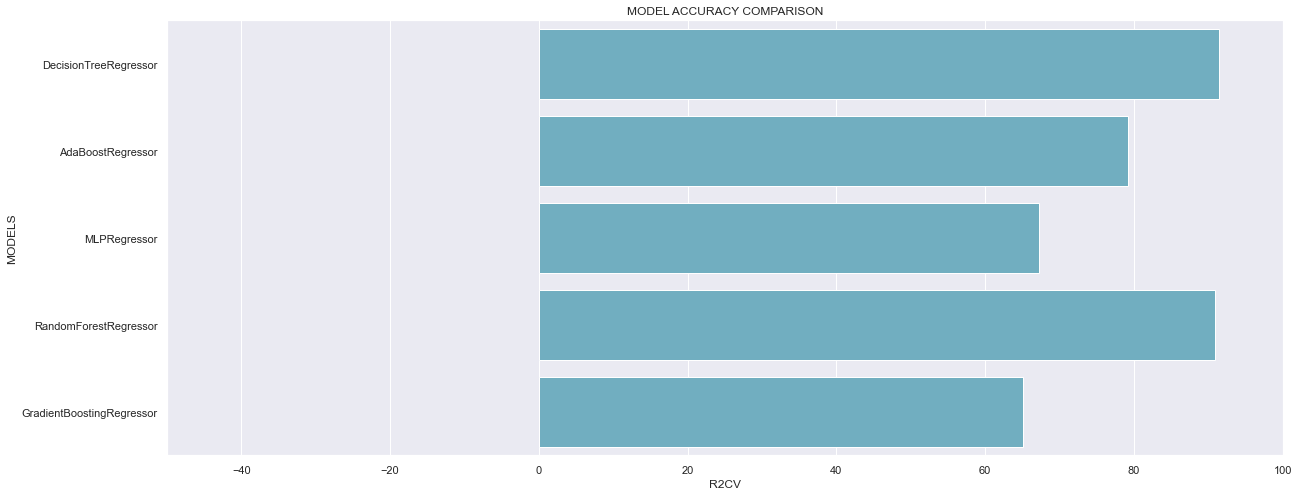

In [57]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,x_test,y_test,cv=10).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="c")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(-50,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()